# 目標

ロジスティック成長モデルを分析して離散力学系の雰囲気を掴む


# ロジスティック成長モデル

[`dynamical_system`](./dynamical_system.ipynb) で $f(x) = 2x$ をバクテリアの増殖モデルとしたが，これではバクテリアが無限に増え続けて良いモデルとは言えない．
ロジスティック成長モデルはこれに増殖を抑える項 $(1-x)$ を付け足したモデルとなっている．

<div class="def" style="border-radius: 0.5rem; border:solid 0.01rem; background-color: rgba(0, 160, 255 , 0.2); padding:1rem 1rem 0rem 1rem" >
<div style="border-bottom: solid 0.01rem; margin:0 0 0.5rem 0" id="ex1">

**ロジスティック写像**

</div>
<div>

$$
f(x) = ax(1-x)
$$

</div>
</div>

パラメータを $a=2.0$
初期値を $x = 0.01$
とした場合と，
パラメータを $a=3.3$
初期値を $x = 0.01$
とした場合をシミュレーションするコードを以下に示す．


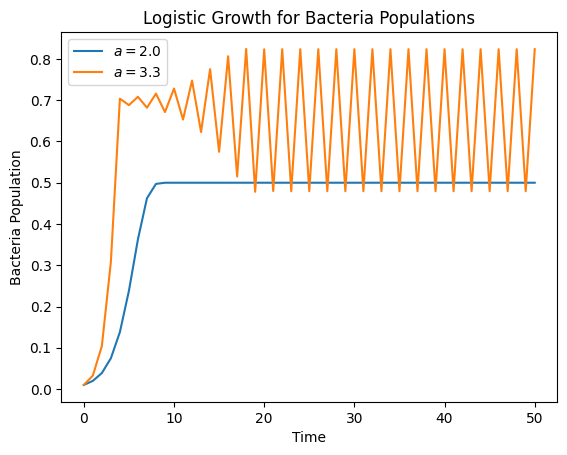

In [1]:
import matplotlib.pyplot as plt
from model.logistic_growth import DiscreteLogisticGrowth

# a = 2.0 での f(x)
m_1 = DiscreteLogisticGrowth(2.0)

# a = 3.5 での f(x)
m_2 = DiscreteLogisticGrowth(3.3)

# 初期値
x_1_init: float = 0.01
x_2_init: float = 0.01

# シミュレーションのステップ数
steps = 50

# バクテリアの個体数のリスト
X_1 = m_1.simulate(x_1_init, steps)
X_2 = m_2.simulate(x_2_init, steps)


# プロット
plt.plot(X_1[0], label="$a = 2.0$")
plt.plot(X_2[0], label="$a = 3.3$")
plt.title("Logistic Growth for Bacteria Populations")
plt.xlabel("Time")
plt.ylabel("Bacteria Population")
plt.legend()
plt.show()

上に示される数値変化がこの系を表す数値解であると言える．
離散力学系はモデルが漸化式となるため
その漸化式を厳密に解けない場合は数値解としてしか解を求めることができない．
これは，連続力学系においても同じである．


## 不動点

$a = 2.0$ のモデルでは
$x = 0.5$ からバクテリアの個体数には変化が見られなくなる．というのも $f(0.5) = 2\times 0.5\times (1 - 0.5) = 0.5$ より， $x = 0.5$ となったとき変化がなくなるのは明らかであり，
これは $a = 2.0$ における $f$ の[**不動点**](./fixed_point.ipynb)である．
また， $x = 0.0$ も $f(0.0) = 0.0$ より不動点である．

<figure style="width: 100%; max-width: 500px; margin: 0 auto; text-align: center;">
  <img src="img/logistic_growth_fixed.png" alt="ロジスティック写像の不動点" style="max-width: 100%; height: auto; object-fit: contain; border: 2px solid #ccc; border-radius: 5px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);">
  <figcaption style="font-style: italic; font-size: 0.8em; color: #666; margin-top: 5px;">ロジスティック写像の不動点</figcaption>
</figure>

### 不動点の安定性

$0.0，0.5$ 共に $a = 2.0$ における $f$ の不動点であるがその付近での $f(x)$ の挙動は異なる．
$f(x)$ は $0.0$ 付近から遠ざかり， $0.5$ 付近では接近する挙動を見せている．
これをそれぞれ，[**源点**](./fixed_point.ipynb)， [**沈点**](./fixed_point.ipynb) という．

(詳しくは [`fixed_point.ipyn`](./fixed_point.ipyn) の $\mathbb{R}$ 上の写像における不動点 を参照 )

<br />

$f(p) = p$ なる不動点において $|f'(p)| < 1$ ならその $p$ は沈点， $|f'(p)| > 1$ なら源点である．
詳しくは [`appendix/app1.ipynb`](./appendix/app1.ipynb) を参照．

<div class="def" style="border-radius: 0.5rem; border:solid 0.01rem; background-color: rgba(0, 160, 255 , 0.2); padding:1rem 1rem 0rem 1rem" >
<div style="border-bottom: solid 0.01rem; margin:0 0 0.5rem 0">

**具体例**: (沈点と源点)

</div>
<div>

$0.5$ は $a = 2.0$ における ロジスティック成長モデル $f$ の沈点
$0.0$ は 源点である．

</div>
</div>

沈点，や源点以外にもサドルや渦心点などの不動点が存在する．[参考:henon_map]

$y = x$ のグラフとともに示すと
$x$ は $0.0$ から遠ざかり， $0.5$ へと吸引される動きをとることがよくわかる．(クモの巣図法という)


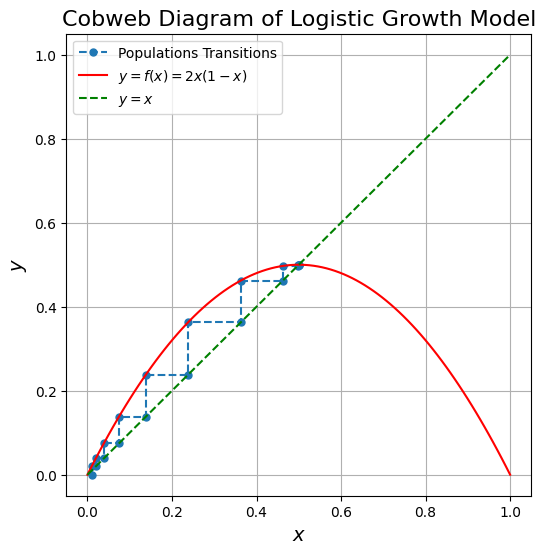

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from model.logistic_growth import DiscreteLogisticGrowth

m = DiscreteLogisticGrowth(2.0)

# 蜘蛛の巣図法シミュレーション用の初期値
web_x_init: float = 0.01
web_y_init: float = 0.0

# シミュレーションのステップ数
steps = 10

# 蜘蛛の巣図法シミュレーションのプロット用
# x 軸成分
web_x: list[float] = [web_x_init]
# y 軸成分
web_y: list[float] = [web_y_init]

# シミュレーション
for step in range(steps):
    x_current: float = web_x[-1]
    y_current: float = m.model(x_current)
    web_x.extend([x_current, y_current])
    web_y.extend([y_current, y_current])

# f(x) = 2x(1-x) のグラフ
x: np.ndarray = np.linspace(0, 1, 100)
y_logistic: np.ndarray = m.model(x)

# y = x の直線
y_identity = x

# グラフのプロット
plt.figure(figsize=(6, 6))
plt.plot(
    web_x,
    web_y,
    linestyle="dashed",
    marker="o",
    markersize=5,
    label="Populations Transitions",
)
plt.plot(x, y_logistic, label="$y = f(x) = 2x(1-x)$", color="red")
plt.plot(x, y_identity, label="$y=x$", linestyle="--", color="green")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.title("Cobweb Diagram of Logistic Growth Model", fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

## 周期軌道

$a = 3.3$ の場合， $f(\frac{23}{33}) = \frac{23}{33}$ で $x = \frac{23}{33} \approx 0.69697$ が不動点であるが，これは源点であり，そこに収束せず，振動する．
$f(0.4794) \approx 0.8236$， $f(0.8236) \approx 0.4794$ で $0.4794$ と $0.8236$ の 2 点を振動することがわかる．

<div style="border-radius: 0.5rem; border:solid 0.01rem; background-color: rgba(192, 160, 255 , 0.2); padding:1rem 1rem 0rem 1rem" >
<div style="border-bottom: solid 0.01rem; margin:0 0 0.5rem 0">

**定義**: (周期点)

</div>
<div>

$f^{k}(p) = p$ なる $p$ で $k$ が最小の自然数であるとき $p$ を $f$ の $k$ 周期点という．
また， $k$ 周期点から $f$ を適用して得られる $k$ 個の点による軌道を $k$ 周期軌道という．

</div>
</div>

上の定義より， $k$ 周期軌道上の点は $f^k$ の不動点である．

<div class="def" style="border-radius: 0.5rem; border:solid 0.01rem; background-color: rgba(0, 160, 255 , 0.2); padding:1rem 1rem 0rem 1rem" >
<div style="border-bottom: solid 0.01rem; margin:0 0 0.5rem 0">

**具体例**: (周期軌道)

</div>
<div>

$0.4794$， $0.8236$ は $f$ の 2 周期軌道である．

</div>
</div>

<br />

<figure style="width: 100%; max-width: 500px; margin: 0 auto; text-align: center;">
  <img src="img/logistic_growth_2periodic.png" alt="ロジスティック写像の2周期軌道" style="max-width: 100%; height: auto; object-fit: contain; border: 2px solid #ccc; border-radius: 5px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);">
  <figcaption style="font-style: italic; font-size: 0.8em; color: #666; margin-top: 5px;">ロジスティック写像の2周期軌道</figcaption>
</figure>

<br />

<div style="border-radius: 0.5rem; border:solid 0.01rem; background-color: rgba(192, 160, 255 , 0.2); padding:1rem 1rem 0rem 1rem" >
<div style="border-bottom: solid 0.01rem; margin:0 0 0.5rem 0">

**定義**: (吸引的周期軌道，反発的周期軌道)

</div>
<div>

$k$ 周期軌道上の点 $p$ が $f^{k}$ の沈点であるとき， この軌道を 吸引的周期軌道という．

$k$ 周期軌道上の点 $p$ が $f^{k}$ の源点であるとき， この軌道を 反発的周期軌道という．

</div>
</div>

<br />

<div class="def" style="border-radius: 0.5rem; border:solid 0.01rem; background-color: rgba(0, 160, 255 , 0.2); padding:1rem 1rem 0rem 1rem" >
<div style="border-bottom: solid 0.01rem; margin:0 0 0.5rem 0">

**具体例**: (吸引的周期軌道)

</div>
<div>

$0.4794$， $0.8236$ は $f$ の 吸引的周期軌道である．

</div>
</div>


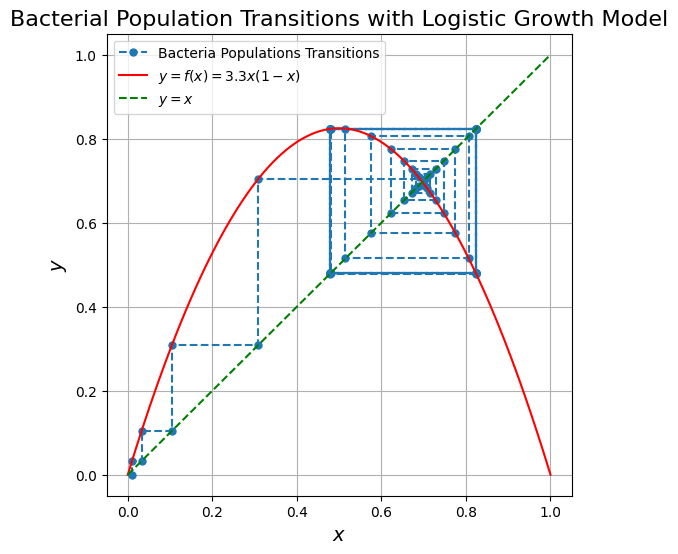

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from model.logistic_growth import DiscreteLogisticGrowth

m = DiscreteLogisticGrowth(3.3)

# 蜘蛛の巣図法シミュレーション用の初期値
web_x_init: float = 0.01
web_y_init: float = 0.0

# シミュレーションのステップ数
steps = 30

web_x, web_y, y_logistic, y_identity = m.web_simulate(
    web_x_init, steps, web_y_init=web_y_init, x_range=np.linspace(0, 1, 100)
)

# グラフのプロット
plt.figure(figsize=(6, 6))
plt.plot(
    web_x,
    web_y,
    linestyle="dashed",
    marker="o",
    markersize=5,
    label="Bacteria Populations Transitions",
)
plt.plot(x, y_logistic, label="$y = f(x) = 3.3x(1-x)$", color="red")
plt.plot(x, y_identity, label="$y=x$", linestyle="--", color="green")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.title("Bacterial Population Transitions with Logistic Growth Model", fontsize=16)
plt.grid(True)
plt.legend()
plt.show()

## 分岐図

このように パラメータ $a$ によって系の振る舞いが異なることが観察でき，このような振る舞いの変化を**分岐**と呼ぶ．
以下に， $a$ の値に応じて変化する吸引的不動点をプロットしたグラフを示す(**分岐図**という)[[1](#foornote1)]．

このようにして，系の性質を知ることも力学系の一つの目的である．


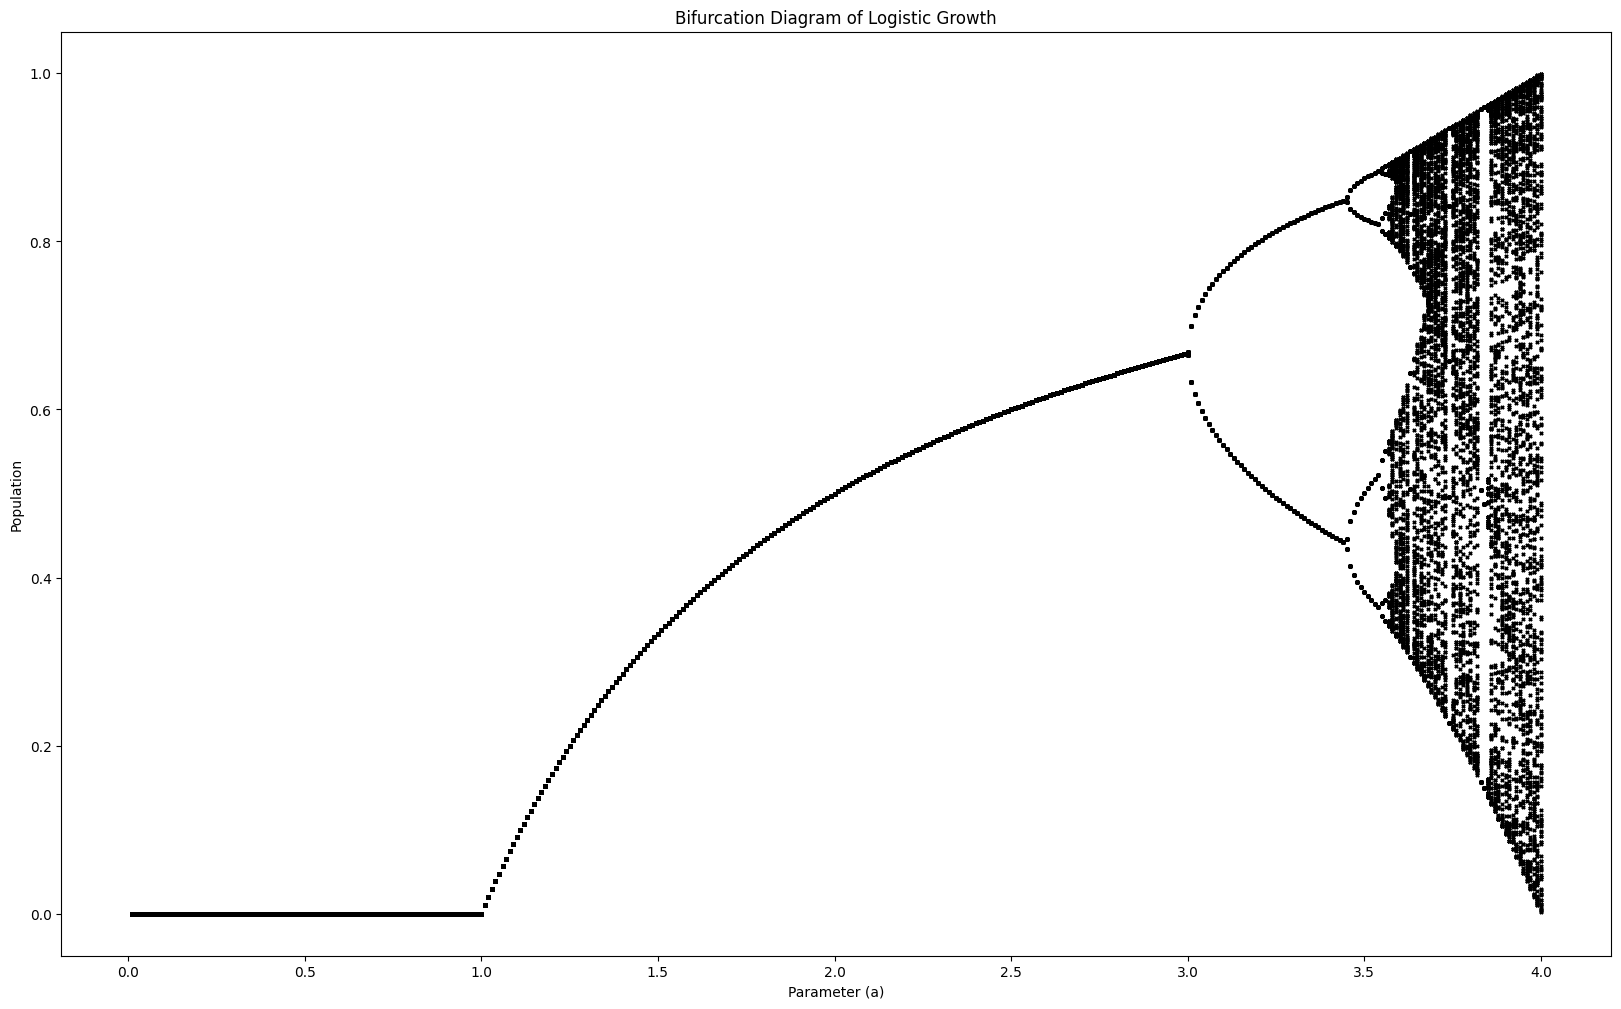

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from model.logistic_growth import DiscreteLogisticGrowth

# ステップ数
steps = 19800

# シミュレーションする係数 a 群
a_array = np.arange(0.01, 4.01, 0.01)

rng = np.random.default_rng()

# シミュレーション結果を格納する行列
X = np.zeros((len(a_array), 200))

for i, a in enumerate(a_array):
    m = DiscreteLogisticGrowth(a)
    # 初期値は 0.0 ~ 1.0 までの乱数
    x: float = rng.random()
    for _ in range(steps):
        x = m.model(x)

    # 最後の 200 個を周期点として回収する
    X[i, 0] = x
    for j in range(199):
        x = m.model(x)
        X[i, j + 1] = x


plt.figure(figsize=(20, 12))
for i in range(len(a_array)):
    plt.scatter([a_array[i]] * 200, X[i], color="black", marker="x", s=5)
plt.xlabel("Parameter (a)")
plt.ylabel("Population")
plt.title("Bifurcation Diagram of Logistic Growth")
plt.show()

<a name="footnote1">1</a>: K.T. アリグッド, T.D. サウアー, J.A. ヨーク著, 星野高志ほか訳『カオス : 力学系入門 (Chaos: Introduction to Dynamical Systems)』, シュプリンガー・ジャパン, 東京, Japan, 2006.12-2007.4, ISBN: 978-4-431-71236-7 [4431712364].

<a name="footnote2">2</a>: 小室元政著, 『基礎からの力学系 : 分岐解析からカオス的遍歴へ. 新版』, サイエンス社, 東京, Japan, 2005.12
ISBN: 9784781911182 [4781911188].
